(20, 1) (20, 1)


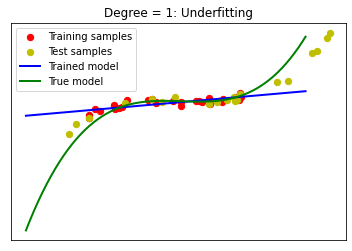

(20, 1) (20, 1)


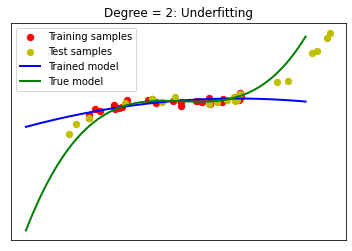

(20, 1) (20, 1)


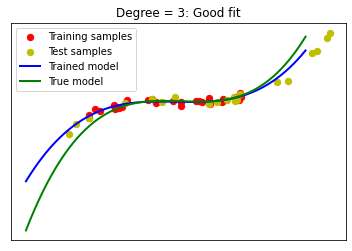

(20, 1) (20, 1)


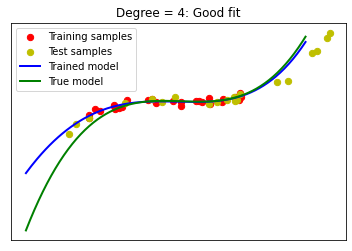

(20, 1) (20, 1)


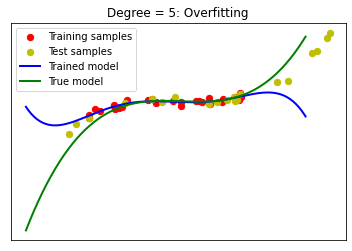

In [3]:
# Example of overfitting

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
from sklearn import linear_model


def main():
    N = 30
    N_test = 20
    X = np.random.rand(N, 1) * 5
    y = 3 * (X - 2) * (X - 3) * (X - 4) + 10 * np.random.randn(N, 1)

    X_test = (np.random.rand(N_test, 1) - 1 / 8) * 10
    y_test = 3 * (X_test - 2) * (X_test - 3) * (X_test - 4) + 10 * np.random.randn(N_test, 1)

    def buildX(X, d=2):
        res = np.ones((X.shape[0], 1))
        for i in range(1, d + 1):
            res = np.concatenate((res, X ** i), axis=1)
        return res

    def myfit(X, y, d):
        Xbar = buildX(X, d)
        regr = linear_model.LinearRegression(fit_intercept=False)  # fit_intercept = False for calculating the bias
        regr.fit(Xbar, y)

        w = regr.coef_
        # Display result
        w_0 = w[0][0]
        w_1 = w[0][1]
        x0 = np.linspace(-2, 7, 200, endpoint=True)
        y0 = np.zeros_like(x0)
        ytrue = 5 * (x0 - 2) * (x0 - 3) * (x0 - 4)
        for i in range(d + 1):
            y0 += w[0][i] * x0 ** i

        # Draw the fitting line
        plt.scatter(X.T, y.T, c='r', s=40, label='Training samples')  # data
        print(X_test.shape, y_test.shape)
        plt.scatter(X_test.T, y_test.T, c='y', s=40, label='Test samples')  # data

        plt.plot(x0, y0, 'b', linewidth=2, label="Trained model")  # the fitting line
        plt.plot(x0, ytrue, 'g', linewidth=2, label="True model")  # the fitting line
        plt.xticks([], [])
        plt.yticks([], [])
        if d < 3:
            str1 = 'Underfitting'
        elif d > 4:
            str1 = 'Overfitting'
        else:
            str1 = 'Good fit'
        str0 = 'Degree = ' + str(d) + ': ' + str1
        plt.title(str0)
        plt.legend(loc='upper left')
        plt.show()

    for d in range(1, 6):
        myfit(X, y, d)

if __name__ == '__main__':
    main()